In [106]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [77]:
dftrain=pd.read_csv("health_train.csv") #algoritmanın dataya nasıl davrandığını küçük veriler ile daha rahat anlıyoruz
dftrain.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [78]:
dftrain["age"]=dftrain.age.round()

In [79]:
dftest=pd.read_csv("health_test.csv") #algoritmanın dataya nasıl davrandığını küçük veriler ile daha rahat anlıyoruz
dftest.head()

,age,sex,bmi,smoker,region,children
0,39.296556,male,29.978109,no,northwest,4
1,40.367560,female,27.927669,no,southeast,5
2,32.881563,male,41.576865,no,southwest,5
3,62.000000,female,30.495000,no,northwest,2
4,32.476173,male,30.322774,yes,northeast,4


In [80]:
dftrain.shape,dftest.shape

((2500, 7), (451, 6))

In [81]:
dftest["age"]=dftest.age.round()

<AxesSubplot:xlabel='charges'>

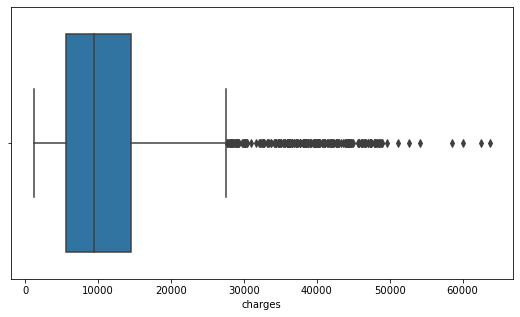

In [82]:
sns.boxplot(dftrain["charges"])

In [83]:
dftrain.smoker.value_counts()

no     2124
yes     376
Name: smoker, dtype: int64

<AxesSubplot:xlabel='age'>

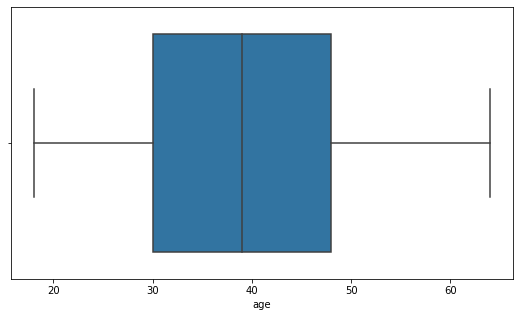

In [127]:
sns.boxplot(dftest.age)

In [84]:
dftrain[(dftrain["charges"]>30000) | (dftrain["smoker"]=="no")]

,age,sex,bmi,smoker,region,children,charges
0,21.0,male,25.745000,no,northeast,2,3279.868550
2,18.0,male,30.030000,no,southeast,1,1720.353700
3,37.0,male,30.676891,no,northeast,3,6801.437542
4,58.0,male,32.010000,no,southeast,1,11946.625900
5,46.0,male,26.620000,no,southeast,1,7742.109800
...,...,...,...,...,...,...,...
2495,31.0,male,27.555148,no,southeast,4,5889.103901
2496,37.0,male,30.322446,no,northeast,3,6788.534095
2497,56.0,female,36.179587,no,northwest,2,12401.746575
2498,49.0,male,36.429614,no,northwest,3,10376.294629


In [85]:
dftest

,age,sex,bmi,smoker,region,children
0,39.0,male,29.978109,no,northwest,4
1,40.0,female,27.927669,no,southeast,5
2,33.0,male,41.576865,no,southwest,5
3,62.0,female,30.495000,no,northwest,2
4,32.0,male,30.322774,yes,northeast,4
5,22.0,male,32.305187,no,northeast,5
6,46.0,male,34.097296,no,northwest,3
7,39.0,male,25.238490,no,southeast,5
8,42.0,male,31.214778,no,southeast,5
9,19.0,male,25.555000,no,northwest,0


In [86]:
dftrain["smoker"].value_counts()

no     2124
yes     376
Name: smoker, dtype: int64

In [87]:
y_train=dftrain.charges
X_train=dftrain.drop("charges",axis=1)
X_test=dftest

In [88]:
X_train.shape,y_train.shape,X_test.shape

((2500, 6), (2500,), (451, 6))

In [93]:

X_train["region"]=X_train.region.map({"southeast":0,"northwest":1,"northeast":2,"southwest":3})
X_train["region"].value_counts()

0    699
1    613
2    606
3    582
Name: region, dtype: int64

In [94]:
X_train["smoker"]=X_train.smoker.map({"yes":4,"no":5})
X_train["smoker"].value_counts()


5    2124
4     376
Name: smoker, dtype: int64

In [95]:
X_train["sex"]=X_train.sex.map({"male":7,"female":6})
X_train["sex"].value_counts()

7    1387
6    1113
Name: sex, dtype: int64

In [96]:

X_test["region"]=X_test.region.map({"southeast":0,"northwest":1,"northeast":2,"southwest":3})
X_test["region"].value_counts()

0    125
1    121
3    112
2     93
Name: region, dtype: int64

In [97]:
X_test["smoker"]=X_test.smoker.map({"yes":4,"no":5})
X_test["smoker"].value_counts()

5    366
4     85
Name: smoker, dtype: int64

In [98]:
X_test["sex"]=X_test.sex.map({"male":7,"female":6})
X_test["sex"].value_counts()

7    259
6    192
Name: sex, dtype: int64

In [114]:
def train_val(model, X_train, y_train, X_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
   }
    
    return pd.DataFrame(scores)

In [113]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [100]:
xgb_model = XGBRegressor(random_state=101, objective="reg:squarederror")

In [101]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             8.477260e-01
test_neg_mean_absolute_error       -2.135033e+03
test_neg_mean_squared_error        -1.675096e+07
test_neg_root_mean_squared_error   -4.073840e+03
dtype: float64

In [115]:
train_val(xgb_model, X_train, y_train, X_test)

,train
R2,9.860394e-01
mae,7.010790e+02
mse,1.565997e+06
rmse,1.251398e+03


NameError: name 'y_pred' is not defined

In [117]:
 y_pred = xgb_model.predict(X_test)

In [118]:
y_pred

array([ 8135.408 ,  9267.3545,  6398.9937, 15319.814 , 35736.043 ,
        6420.3203, 10399.261 ,  7916.6577, 10012.415 ,  1019.507 ,
       13339.358 ,  5213.804 , 12312.09  ,  8117.8423, 10625.395 ,
        5625.16  ,  7459.4473,  6873.1973,  3305.3528, 38902.35  ,
        3660.179 , 10630.318 , 33569.86  , 29396.281 ,  8503.673 ,
        5402.9326, 15628.88  ,  4202.5854,  5487.317 , 27478.836 ,
        5847.107 ,  8955.776 , 12700.081 ,  9593.351 , 38068.734 ,
        5956.5684, 21136.572 , 13467.825 ,  9984.913 , 47582.855 ,
       12985.727 , 12302.164 , 21871.072 , 40478.62  ,  6052.0825,
        5963.975 ,  5665.4756, 11014.231 , 14129.747 , 18352.715 ,
       11571.583 ,  6684.0386, 12294.695 , 11118.292 , 14875.383 ,
       38408.28  , 11754.736 , 12439.11  ,  7104.7363, 11251.637 ,
        4690.847 , 43177.434 , 35927.105 , 36410.695 , 10372.159 ,
        9767.382 ,  5912.534 ,  5463.803 ,  6653.1772, 40328.93  ,
       12588.891 ,  7273.2715,  8558.194 , 11347.678 , 10554.5

In [119]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [120]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [121]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=101, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
 

In [122]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 7,
 'n_estimators': 100,
 'subsample': 0.5}

In [123]:
grid_model.best_score_

-3751.872404413537

In [124]:
train_val(grid_model, X_train, y_train, X_test)

,train
R2,9.421660e-01
mae,1.243129e+03
mse,6.487381e+06
rmse,2.547034e+03


In [129]:
fin=grid_model.predict(X_test)

In [131]:
X_test.shape

(451, 6)

In [132]:
pd.Series(fin).shape

(451,)

In [133]:
X_test["y_fin_pred"]=pd.Series(fin)

In [134]:
X_test

,age,sex,bmi,smoker,region,children,y_fin_pred
0,39.0,7,29.978109,5,1,4,8479.902344
1,40.0,6,27.927669,5,0,5,8789.327148
2,33.0,7,41.576865,5,3,5,6799.449219
3,62.0,6,30.495000,5,1,2,15614.866211
4,32.0,7,30.322774,4,2,4,35933.453125
5,22.0,7,32.305187,5,2,5,6485.718750
6,46.0,7,34.097296,5,1,3,10125.645508
7,39.0,7,25.238490,5,0,5,8639.864258
8,42.0,7,31.214778,5,0,5,10241.461914
9,19.0,7,25.555000,5,1,0,1228.497803


In [135]:
X_test.to_csv("C9264.csv", index=False)